# Importing important Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets

# Load the CIFAR-10 dataset from keras datasets

### Once loaded it's advisable to normalize the images and flatten the labels

In [2]:
cifar_10 = datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar_10.load_data()

# Normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Number of labels
# We know labels = 10 but use method
k = len(set(y_train))
print('Number of classes are', k)

Number of classes are 10


In [3]:
print('size of training data', X_train.shape)

size of training data (50000, 32, 32, 3)


# Creating the CNN Model

### We use Conv2D with 32 filters and stride of 1 accompanied by activation of relu, maxpooling layer and Batchnormalization layer.
### Above articheture is repeated with 64 and 128 filters respectively with same activation i.e ReLu
### We add aFlatten layer and incude a dropout of 0.2 as regularization
### In fullconnected layer we have 1024 neurons with relu activation and a Dropout of 0.2
### In final layer we have 10 neurons with softmax activation

### We use adam optimizer , sparse categorical crossentropy as loss and accuracy as metrics.

In [4]:
model = Sequential([
            Conv2D(32, (3,3), strides = 1, input_shape = (X_train.shape[1:])),
            MaxPooling2D((2,2)),
            BatchNormalization(),
            Conv2D(64, (3,3), strides = 1, activation = 'relu'),
            MaxPooling2D((2,2)),
            BatchNormalization(),
            Conv2D(128, (3,3), strides = 1, activation = 'relu'),
            MaxPooling2D((2,2)),
            BatchNormalization(),
            Flatten(),
            Dropout(0.2),
            Dense(1024, activation = 'relu'),
            Dropout(0.2),
            Dense(k, activation = 'softmax')
            ])

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

# Augmenting the training data
### We use ImageDataGenerator for augmentation task with following parameters
### i. rotation range
### ii. width shift range
### iii. height shift range
### iv. horizontal flip

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                            )

batch_size = 32

image_generator = datagen.flow(X_train, y_train, batch_size = batch_size)

steps_per_epoch = X_train.shape[0]//batch_size

# Fitting the model
### We use the flow created using ImageDataGenerator to train the model

In [7]:
r = model.fit(image_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 80)

Epoch 1/80
1562/1562 [==============================] - 63s 40ms/step - loss: 1.9400 - accuracy: 0.3394 - val_loss: 1.3709 - val_accuracy: 0.5227
Epoch 2/80
1562/1562 [==============================] - 61s 39ms/step - loss: 1.3998 - accuracy: 0.4978 - val_loss: 1.4236 - val_accuracy: 0.5292
Epoch 3/80
1562/1562 [==============================] - 62s 39ms/step - loss: 1.2667 - accuracy: 0.5526 - val_loss: 1.0766 - val_accuracy: 0.6229
Epoch 4/80
1562/1562 [==============================] - 62s 39ms/step - loss: 1.1962 - accuracy: 0.5763 - val_loss: 1.0510 - val_accuracy: 0.6283
Epoch 5/80
1562/1562 [==============================] - 61s 39ms/step - loss: 1.1512 - accuracy: 0.5938 - val_loss: 0.9980 - val_accuracy: 0.6505
Epoch 6/80
1562/1562 [==============================] - 62s 39ms/step - loss: 1.1094 - accuracy: 0.6131 - val_loss: 0.9869 - val_accuracy: 0.6630
Epoch 7/80
1562/1562 [==============================] - 61s 39ms/step - loss: 1.0593 - accuracy: 0.6280 - val_loss: 0.9050 -

Epoch 57/80
1562/1562 [==============================] - 59s 38ms/step - loss: 0.7071 - accuracy: 0.7548 - val_loss: 0.6158 - val_accuracy: 0.7914
Epoch 58/80
1562/1562 [==============================] - 61s 39ms/step - loss: 0.7057 - accuracy: 0.7554 - val_loss: 0.5634 - val_accuracy: 0.8105
Epoch 59/80
1562/1562 [==============================] - 60s 39ms/step - loss: 0.7085 - accuracy: 0.7545 - val_loss: 0.5647 - val_accuracy: 0.8072
Epoch 60/80
1562/1562 [==============================] - 63s 40ms/step - loss: 0.7045 - accuracy: 0.7553 - val_loss: 0.6689 - val_accuracy: 0.7732
Epoch 61/80
1562/1562 [==============================] - 60s 38ms/step - loss: 0.6913 - accuracy: 0.7614 - val_loss: 0.6024 - val_accuracy: 0.7973
Epoch 62/80
1562/1562 [==============================] - 60s 38ms/step - loss: 0.7112 - accuracy: 0.7539 - val_loss: 0.6058 - val_accuracy: 0.7958
Epoch 63/80
1562/1562 [==============================] - 61s 39ms/step - loss: 0.6913 - accuracy: 0.7612 - val_loss: 0

# Plotting the history
### We can see from the graphs that augmentation helped in avoiding overfitting

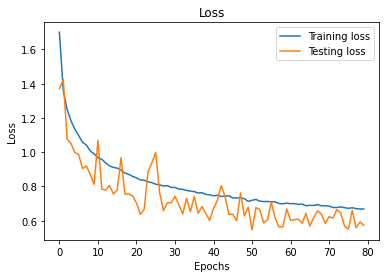

In [8]:
plt.plot(r.history['loss'], label = 'Training loss')
plt.plot(r.history['val_loss'], label = 'Testing loss')
plt.legend();
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss');

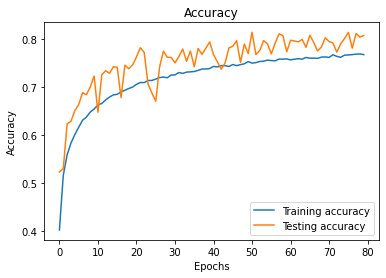

In [9]:
plt.plot(r.history['accuracy'], label = 'Training accuracy')
plt.plot(r.history['val_accuracy'], label = 'Testing accuracy')
plt.legend();
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy');